 Linear Regression

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. 

Regression is a way of describing how one variable, the outcome, is numerically related to predictor variables. The dependent variable is also referred to as Y, dependent or response and is plotted on the vertical axis (ordinate) of a graph. The predictor variable(s) is(are) also referred to as X, independent, prognostic or explanatory variables. The horizontal axis (abscissa) of a graph is used for plotting X.

![Image](img/linear-regression-algorithm-tutorial-test.png)


Quandl is a platform for financial, economic, and alternative data that serves investment professionals.

To begin, we'll start with simple stock price for Google, with the ticker of GOOGL:

In [1]:
import quandl 
import pandas as pd

df = quandl.get("WIKI/GOOGL") 

print(df.head())


              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [2]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


let's go ahead and pair down our original dataframe a bit:

In [3]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [4]:
df.describe()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close']*100.00

In [6]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [7]:
#New Data Frame
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [8]:
#All imports now
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Our features are actually: current price, high minus low percent, and the percent change volatility. The price that is the label shall be the price at some determined point the future. Let's go ahead and add a few new rows:

In [9]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

 we've decided the features are a bunch of the current values, and the label shall be the price, in the future, where the future is 1% of the entire length of the dataset out. We'll assume all current columns are our features, so we'll add a new column with a simple pandas operation:

In [10]:
df['label'] = df[forecast_col].shift(-forecast_out)

We'll then drop any still NaN information from the dataframe:

In [11]:
df.dropna(inplace=True)

It is a typical standard with machine learning in code to define X (capital x) as the features, and y (lowercase y) as the label that corresponds to the features. As such, we can define our features and labels like so:

In [22]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

Generally, you want your features in machine learning to be in a range of -1 to 1. This may do nothing, but it usually speeds up processing and can also help with accuracy. Because this range is so popularly used, it is included in the preprocessing module of Scikit-Learn.

In [24]:
df.dropna(inplace= True)
X = preprocessing.scale(X)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

If you test on the last 20% of your data, you can get a sort of accuracy and reliability, often called the confidence score. There are many ways to do this, but, probably the best way is using the build in cross_validation provided, since this also shuffles your data for you. The code to do this:

In [26]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9771185963224072
poly 0.4763813083226852
rbf 0.7858714650150658
sigmoid 0.8807060397180679


As we can see, the linear kernel performed the best, closely by rbf, then poly, then sigmoid was clearly just goofing off and definitely needs to be kicked from the team.

In [27]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.979466138777371


In [28]:
forecast_set = clf.predict(X_lately)

In [29]:
print(forecast_set, confidence, forecast_out)

[1074.60093372 1088.73412939 1102.35075588 1097.05395162 1090.60580079
 1088.54599125 1087.3190947  1083.46934936 1077.65415029 1073.20198958
 1071.47787468 1089.96516823 1108.34947008 1113.55034802 1128.16232273
 1132.40078999 1130.47833795 1128.38541455 1130.03750216 1147.673297
 1146.85461029 1156.60509036 1153.21892195 1161.62028665 1181.37692895
 1194.36347615 1187.90454079 1200.17410606 1204.6955665  1204.31688449
 1195.15376335 1199.95835793 1198.7556173  1134.20323617 1078.62852673] 0.979466138777371 35


In [30]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [31]:
style.use('ggplot')

In [32]:
df['Forecast'] = np.nan

In [33]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [34]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

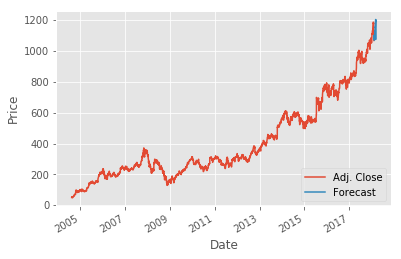

In [35]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

While our machine learning classifier takes a few seconds to train, there may be cases where it takes hours or even days to train a classifier. Imagine needing to do that everyday you wanted to forecast prices, or whatever. This is not necessary, as we can just save the classifier using the Pickle module. 
First make sure you have imported it.

With pickle, you can save any Python object, like our classifier. After defining, training, and testing your classifier, add:

In [36]:
import pickle
with open('Stock Price prediction.pickle','wb') as f:
    pickle.dump(clf, f)

Now, all you need to do to use the classifier is load in the pickle, save it to clf, and use just like normal. 

In [37]:
pickle_in = open('Stock Price prediction.pickle','rb')
clf = pickle.load(pickle_in)

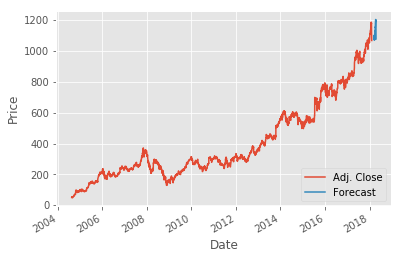

In [38]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()